In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[0, 2, 0, 15]

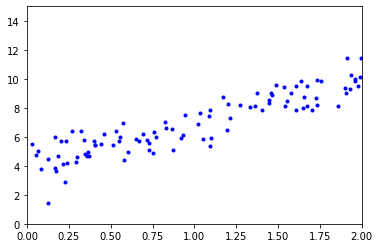

In [3]:
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best # close enough to 4 and 3

array([[3.96111245],
       [2.99661205]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.96111245],
       [9.95433656]])

[0, 2, 0, 15]

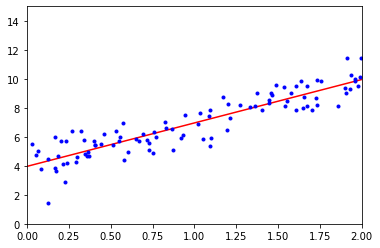

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([3.96111245]), array([[2.99661205]]))

In [10]:
lin_reg.predict(X_new)

array([[3.96111245],
       [9.95433656]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96111245],
       [2.99661205]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.96111245],
       [2.99661205]])

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

In [14]:
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [15]:
theta

array([[3.96111245],
       [2.99661205]])

In [16]:
from sklearn.base import BaseEstimator

class myBatchGradDescent(BaseEstimator):
    def __init__(self, eta=0.1, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
    def fit(self, X, y):
        theta = np.random.randn(2, 1)
        X_b = np.c_[np.ones((len(X), 1)), X]
        for iteration in range(self.n_iterations):
            gradient = 2/len(X) * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.eta * gradient
        self.theta_ = theta
        return self
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_iterations': [100, 500, 1000], 'eta': [0.02, 0.1, 0.5]}

myBGD = myBatchGradDescent()
grid_search = GridSearchCV(myBatchGradDescent(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y)

/home/ankit/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=5, error_score=nan,
             estimator=myBatchGradDescent(eta=0.1, n_iterations=1000),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.02, 0.1, 0.5],
                         'n_iterations': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
grid_search.cv_results_

{'mean_fit_time': array([0.00252986, 0.0148345 , 0.01793165, 0.00179567, 0.00820622,
        0.01399136, 0.00146255, 0.00674858, 0.01312432]),
 'std_fit_time': array([1.26198298e-03, 1.46955508e-03, 2.80760390e-03, 3.12026096e-04,
        1.38312026e-03, 4.16553845e-04, 2.01508698e-05, 5.29835823e-05,
        4.20160472e-04]),
 'mean_score_time': array([0.00060506, 0.00063753, 0.00061779, 0.00049591, 0.00064015,
        0.00060062, 0.00045614, 0.00052824, 0.00055265]),
 'std_score_time': array([1.12077772e-04, 6.61878489e-05, 4.43882381e-05, 4.44388184e-05,
        1.54650869e-04, 4.59559217e-05, 3.22922629e-05, 2.18428896e-05,
        9.96329534e-05]),
 'param_eta': masked_array(data=[0.02, 0.02, 0.02, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_iterations': masked_array(data=[100, 500, 1000, 100, 500, 1000, 100, 500, 1000],
         

In [19]:
grid_search.best_params_

{'eta': 0.02, 'n_iterations': 500}

In [20]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient

In [21]:
theta

array([[3.93078505],
       [3.05028425]])

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.95295933]), array([2.99767861]))

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.95086778])

In [26]:
X_poly[0]

array([1.95086778, 3.80588508])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06851775]), array([[1.01499709, 0.51221298]]))

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

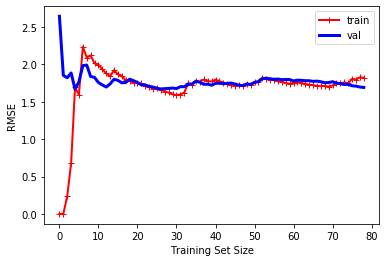

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()

Text(0, 0.5, 'RMSE')

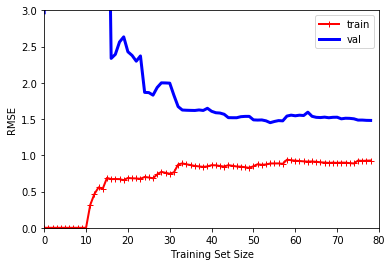

In [30]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')

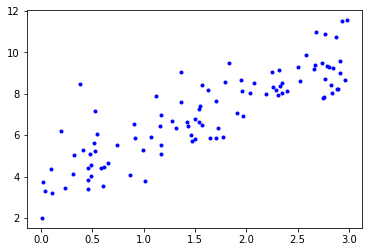

In [31]:
X = 3 * np.random.rand(100, 1)
y = 2 * X + 4 + np.random.randn(100, 1)
plt.plot(X, y, 'b.')

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[6.83026911]])

In [33]:
sgd_reg = SGDRegressor(penalty='l2') #Ridge Regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([6.73862745])

In [34]:
#Lasso Regression - Least Absolute Shrinkage and Selection Operator Regression
#Ridge uses MSE + alpha*0.5*(l2_norm) as cost function
#Lasso uses MSE + alpha*(l1_norm) as cost function

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([6.83920471])

In [36]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([6.84364049])

In [37]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [38]:
best_epoch

239

In [39]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

Text(0, 0.5, 'RMSE')

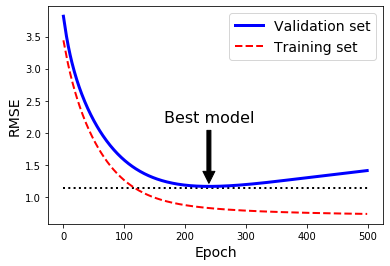

In [40]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [42]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

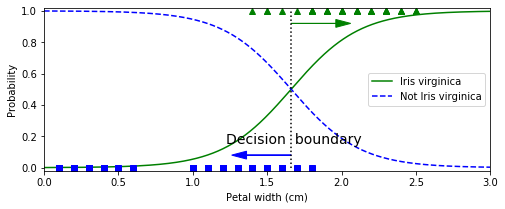

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0][0]
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:')
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, -0.02, 1.02])
plt.legend()
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

In [46]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

[2.9, 7, 0.8, 2.7]

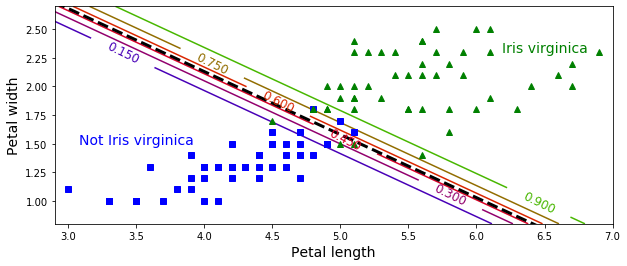

In [47]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

In [48]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))